## Data Science Competition 2019 
#### coding by glee1228@naver.com


In [3]:
from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
  drive.mount('/content/gdrive')
  print('Google Drive is mounted\n')
else:
  print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



### 데이터 확인하기

In [4]:
! ls /content/gdrive/My\ Drive/Colab\ Notebooks/dsc2019

DSC2019_예선_데이터.xlsx   st_data_goldKorea.tsv       st_data_oilForeign.tsv
st_data_exchange.tsv	   st_data_goodsForeign.tsv    st_data_oilKorea.tsv
st_data_foreignCharge.tsv  st_data_itemChargeFull.tsv
st_data_goldForeign.tsv    st_data_koreaIndex.tsv


### 학습데이터 로딩

In [5]:
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
    
# 학습데이터 로딩
dsc2019 = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/dsc2019/DSC2019_예선_데이터.xlsx')

goldKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldKorea.tsv',sep='\t') 
goldForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goldForeign.tsv',sep='\t')
oilKorea = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilKorea.tsv',sep='\t')
oilForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_oilForeign.tsv',sep='\t')
exchange = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_exchange.tsv',sep='\t')
goodsForeign = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_goodsForeign.tsv',sep='\t')
foreignCharge = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_foreignCharge.tsv',sep='\t')
itemChargeFull = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_itemChargeFull.tsv',sep='\t')
koreaIndex = read_csv('/content/gdrive/My Drive/Colab Notebooks/dsc2019/st_data_koreaIndex.tsv',sep='\t')



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 시각화 라이브러리 import

In [6]:
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.0.3


In [7]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


## 우선 금(Gold) 과 유가(Oil) , 원자재(Goods) 위주로 확인해보자! 
st_data_goldKorea.tsv

st_data_oilKorea.tsv

st_data_goldForeign.tsv

st_data_oilForeign.tsv

st_data_goodsForeign.tsv


** 주가 데이터 670000 rows 따라서, 마지막에 확인해보자 **

In [31]:
print(goldKorea.head(3))
print(goldForeign.head(3))
print(oilKorea.head(3))
print(oilForeign.head(3))
print(goodsForeign.head(3))

        date  deal_val  change_val  change_rate   buy_val  sell_val  \
0 2015-01-07  43037.95      220.23      0.51434  45189.84  40886.06   
1 2015-01-13  43276.83      641.66      1.50500  45440.67  41112.99   
2 2015-01-16  43593.24      919.74      2.15530  45772.90  41413.58   

   deposit_val  withdraw_val  international_val  usd_rate  
0     43468.32      42607.58            1214.85    1102.0  
1     43709.59      42844.07            1242.45    1083.5  
2     44029.17      43157.31            1257.92    1078.0  
  itemcode itemname       date  close_val  change_val  open_val  high_val  \
0   COM@GC     국제 금 2015-01-07     1210.6        -8.7    1219.2    1219.2   
1   COM@GC     국제 금 2015-01-13     1234.3         1.6    1239.2    1239.3   
2   COM@GC     국제 금 2015-01-16     1276.9        12.2    1256.1    1279.7   

   low_val  
0   1210.6  
1   1230.3  
2   1256.1  
        date  close_val  change_val  change_rate itemname
0 2015-01-01    1586.62       -5.36        -0.34      휘발

In [32]:
print(goldKorea.info())
print(goldForeign.info())
print(goodsForeign.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 25.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtyp

In [0]:
import datetime

def convertToDatetime(df):
  try:
    dates=[]
    for i in df['date']:
      date=str(i)
      convertDate = datetime.datetime.strptime(date,'%Y%m%d').date()
      dates.append(convertDate)
  
    df['date'] = pd.to_datetime(dates)
  except :
    print('{}'.format(df.info()))
  return df

def groupByItem(df):
  return df.groupby(df['itemcode'])

def splitGold(df):
  groupedGold = groupByItem(df)
  for name , group in groupedGold:
    if name=='COM@GC':
      gold = group
    elif name=='NYM@PA':
      paladium = group
    elif name=='NYM@PL':
      whiteGold = group
    elif name=='COM@SI':
      silver = group
  return gold, paladium, whiteGold, silver

def splitOil(df):
  groupedOil = groupByItem(df)
  for name , group in groupedOil:
    if name=='IPE@EB':
      brentOil = group
    elif name=='NYM@CL':
      wTexasOil = group
    elif name=='NYM@DC':
      dubaiOil = group
  return brentOil, wTexasOil, dubaiOil

def setDateIndex(df):
  df=df.set_index('date',inplace=False)
  return df

def getItemCodes(df):
  return df['itemcode'].unique()

def getItemNames(df):
  return df['itemname'].unique()

def getCodeNames(df):
  codes = getItemCodes(df)
  names = getItemNames(df)
  return zip(codes,names)

def getGraph(df,colName):
  dummy=setDateIndex(df)
  code = getItemCodes(dummy)
  name = getItemNames(dummy)
  print(code,name)
  plt.plot(dummy.index,dummy[colName],label=name)
  plt.xlabel(dummy.index.name)
  plt.ylabel(colName)
    

In [0]:
# Date (Int) -> Date(DateTime)
goldKorea=convertToDatetime(goldKorea)
goldForeign=convertToDatetime(goldForeign)
oilKorea=convertToDatetime(oilKorea)
oilForeign=convertToDatetime(oilForeign)
exchange=convertToDatetime(exchange)
goodsForeign=convertToDatetime(goodsForeign)
foreignCharge=convertToDatetime(foreignCharge)
itemChargeFull=convertToDatetime(itemChargeFull)
koreaIndex=convertToDatetime(koreaIndex)


In [12]:
print(goldForeign['itemcode'].unique())
print(goldForeign['itemname'].unique())

['COM@GC' 'NYM@PA' 'NYM@PL' 'COM@SI']
['국제 금' '팔라듐' '백금' '은']


In [13]:
print(oilForeign['itemcode'].unique())
print(oilForeign['itemname'].unique())

['IPE@EB' 'NYM@CL' 'NYM@DC']
['브렌트유' 'WTI(서부텍사스유) ' '두바이유']


In [29]:
print(goodsForeign['itemcode'].unique())
print(goodsForeign['itemname'].unique())

['LME@AAY' 'CBT$BO' 'CBT$C' 'LME@CDY' 'NYM@HO' 'LME@NDY' 'NYM@NG'
 'LME@PDY' 'CBT$RR' 'CBT$S' 'NYB@SB' 'LME@SDY' 'CBT$SM' 'CBT$W' 'LME@ZDY']
['알루미늄합금' '대두유' '옥수수' '구리' '난방유' '니켈' '천연가스' '납' '쌀' '대두' '설탕' '주석' '대두박'
 '소맥' '아연']


In [0]:
gGoldForeign=goldForeign.groupby(goldForeign['itemcode'])
gOilForeign=oilForeign.groupby(oilForeign['itemcode'])
gGoodsForeign = goodsForeign.groupby(goodsForeign['itemcode'])

In [57]:
print(goldForeign.info())
print(goldKorea.info())
print(type(gGoldForeign))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 8 columns):
itemcode      1333 non-null object
itemname      1333 non-null object
date          1333 non-null datetime64[ns]
close_val     1333 non-null float64
change_val    1327 non-null float64
open_val      1333 non-null float64
high_val      1333 non-null float64
low_val       1333 non-null float64
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 83.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 10 columns):
date                 323 non-null datetime64[ns]
deal_val             323 non-null float64
change_val           323 non-null float64
change_rate          323 non-null float64
buy_val              323 non-null float64
sell_val             323 non-null float64
deposit_val          323 non-null float64
withdraw_val         323 non-null float64
international_val    323 non-null float64
usd_rate             323 non-null 

## 데이터 시각화 
해외 유가, 금, 원자재 그래프 시각화하기!

ps. skewness, kurtosis 로 분포 확인

['IPE@EB'] ['브렌트유']
skewness : 0.2810707721027385
kurtosis : -0.3744093901243071
['NYM@CL'] ['WTI(서부텍사스유) ']
skewness : 0.230490799933492
kurtosis : -0.28367436245456146
['NYM@DC'] ['두바이유']
skewness : 0.16060428525459722
kurtosis : -0.36897950786282996


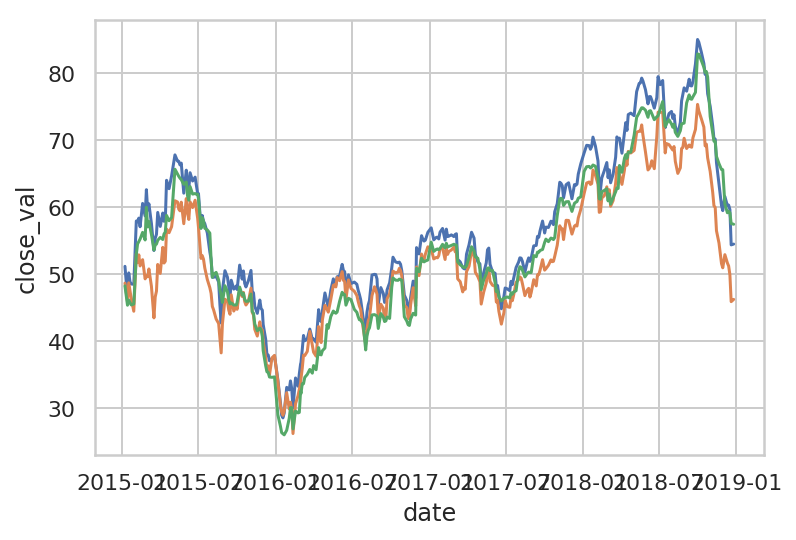

['COM@GC'] ['국제 금']
skewness : -0.47091208479140567
kurtosis : -0.28710572522755085
['COM@SI'] ['은']
skewness : 0.33515658889737415
kurtosis : 0.06387974574128874
['NYM@PA'] ['팔라듐']
skewness : 0.22619217518892742
kurtosis : -0.8742654389263262
['NYM@PL'] ['백금']
skewness : 0.6172025603090334
kurtosis : 0.18396461964090616


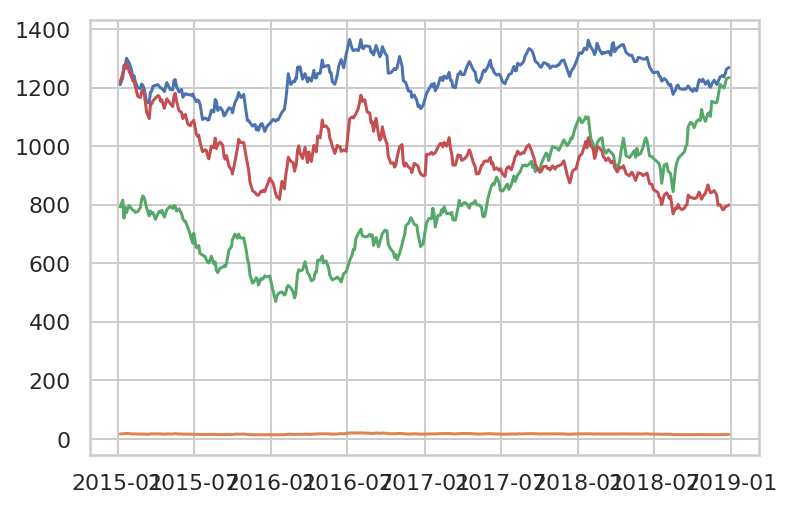

['CBT$BO'] ['대두유']
skewness : -0.2385386879470837
kurtosis : -0.4516266359022114
['CBT$C'] ['옥수수']
skewness : 0.35270687188627337
kurtosis : 0.46439794779731036
['CBT$RR'] ['쌀']
skewness : 0.10661183039099299
kurtosis : -1.0003803707040528
['CBT$S'] ['대두']
skewness : 0.14880125893087
kurtosis : -0.29773292513769123
['CBT$SM'] ['대두박']
skewness : 0.5570704953562924
kurtosis : 0.2963984590652129
['CBT$W'] ['소맥']
skewness : 0.1181894542087046
kurtosis : -0.6167648072251111
['LME@AAY'] ['알루미늄합금']
skewness : -0.2368071398610682
kurtosis : -0.4266257425109332
['LME@CDY'] ['구리']
skewness : 0.0007422593444192196
kurtosis : -1.0634160424500287
['LME@NDY'] ['니켈']
skewness : 0.3236473816169406
kurtosis : -0.9569948296702417
['LME@PDY'] ['납']
skewness : 0.2538172146495171
kurtosis : -1.22723197777784
['LME@SDY'] ['주석']
skewness : -0.5357072765403734
kurtosis : -0.9256519711510651
['LME@ZDY'] ['아연']
skewness : 0.099665333103946
kurtosis : -0.9905219815671842
['NYB@SB'] ['설탕']
skewness : 0.8943255723

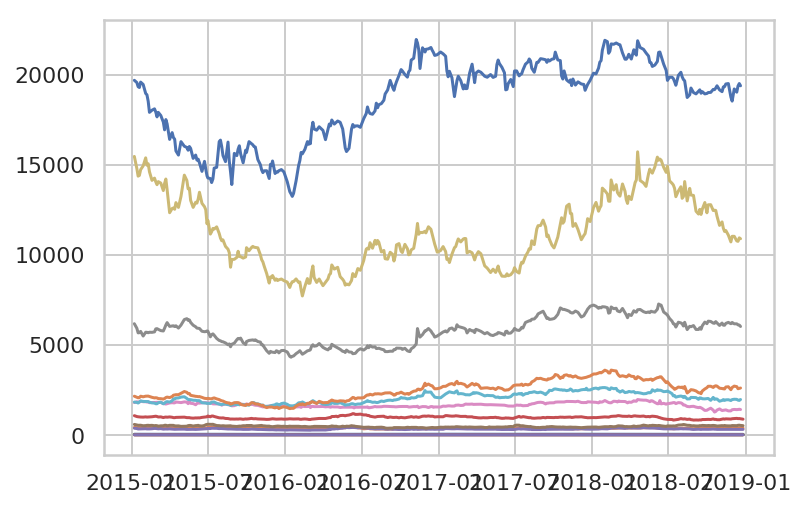

In [75]:
#1개월, 3개월, 6개월, 1년 으로 묶어 skewness와 kurtosis를 확인해본다.
from scipy.stats import skew
from scipy.stats import kurtosis



for id, group in gOilForeign:
  getGraph(group,'close_val')
  print('skewness : {}'.format(skew(group['close_val'])))
  print('kurtosis : {}'.format(kurtosis(group['close_val'])))
  
plt.show()


for id, group in gGoldForeign:
  showGraph(group,'close_val')
  print('skewness : {}'.format(skew(group['close_val'])))
  print('kurtosis : {}'.format(kurtosis(group['close_val'])))
  
plt.show()

for id, group in gGoodsForeign:
  showGraph(group,'close_val')
  print('skewness : {}'.format(skew(group['close_val'])))
  print('kurtosis : {}'.format(kurtosis(group['close_val'])))
  
plt.show()
